In [144]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Device configuration

In [145]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print('CUDA is available')

CUDA is available


Hyper Parameters

In [146]:
input_size = 784 # 28x28 image size
hidden_size1 = 256
hidden_size2 = 128
hidden_size3 = 64
hidden_size4 = 64
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

Importing the MNIST Dataset

In [147]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True) # Shuffle = True is good for training
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


Plot the Images

<function matplotlib.pyplot.show(close=None, block=None)>

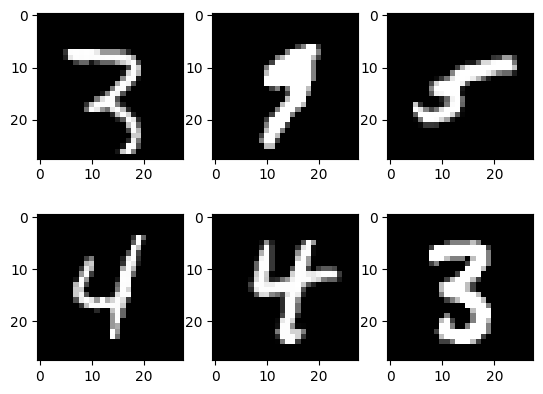

In [148]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show

Creating the Neural Network

In [149]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.LeakyReLU()
        self.l2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.LeakyReLU()
        self.l3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu3 = nn.LeakyReLU()
        self.l4 = nn.Linear(hidden_size3, num_classes)
    def forward(self, x):
        out = self.l1(x)
        out = self.relu1(out)
        out = self.relu2(out)
        out = self.relu3(out)
        out = self.l2(out)
        return out

In [150]:
model = NeuralNet(input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, num_classes).to(device)

Loss and Optimizer

In [151]:
criterion = nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

Training Loop

In [152]:
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, lables) in enumerate(train_loader): # i = index , (images, labels) = data
        # 100, 1, 28, 28
        # 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Step {i+1}/{n_total_steps}, Loss = {loss.item():.4f}')

Epoch 1/2, Step 100/600, Loss = 2.2811
Epoch 1/2, Step 200/600, Loss = 2.2855
Epoch 1/2, Step 300/600, Loss = 2.3019
Epoch 1/2, Step 400/600, Loss = 2.3026
Epoch 1/2, Step 500/600, Loss = 2.2889
Epoch 1/2, Step 600/600, Loss = 2.2930
Epoch 2/2, Step 100/600, Loss = 2.2855
Epoch 2/2, Step 200/600, Loss = 2.2725
Epoch 2/2, Step 300/600, Loss = 2.2728
Epoch 2/2, Step 400/600, Loss = 2.2880
Epoch 2/2, Step 500/600, Loss = 2.2710
Epoch 2/2, Step 600/600, Loss = 2.2944


Testing and Evaluation

In [153]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1) # Actual Predictions, torch.max => Value, Index
        n_samples += labels.shape[0]
        n_correct += (predicted == labels).sum().item()
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy : {acc:.2f}%')

Accuracy : 11.24%
